# Credit Card Fraud Detection Project

* The aim of this project is to predict whether a credit card transaction is fraudulent or not, based on the transaction amount, time and other transaction related data. 
* It aims to track down credit card transaction data, which is done by detecting anomalies in the transaction data. 

**Objective** is to predict whether the instance of a credit card transaction is fraudulent or valid




**Creator**: Anandan Raju

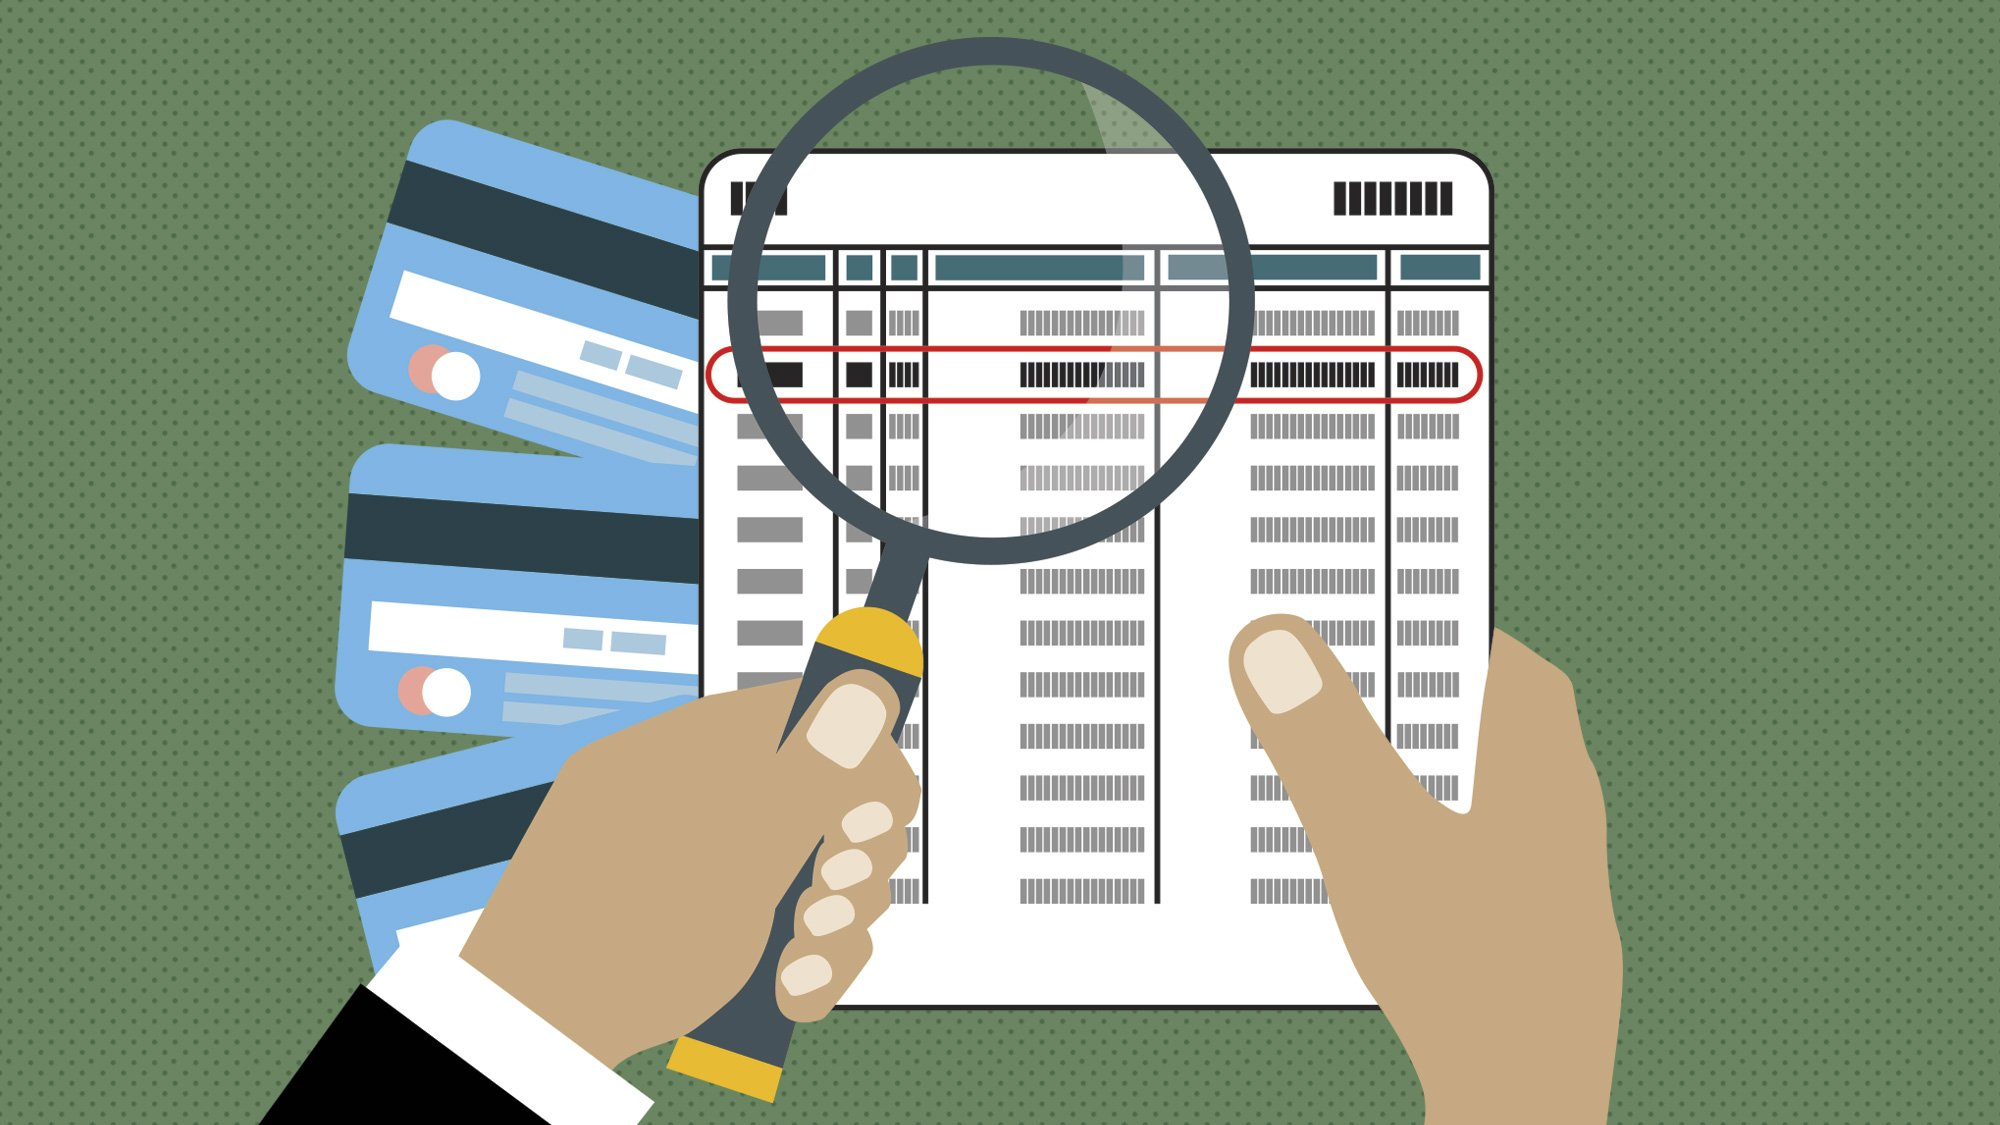

> Credit card fraud detection is typically implemented using an algorithm that detects any anomalies in the transaction data and notifies the cardholder (as a precautionary measure) and the bank about any suspicious transaction.

**To avoid misuse of data, the dataset has been masked. Hence we are unable to explain columns V1 to V28. All the columns between V1 to V28 are used as independent variable**

The other two independent columns are **Amount** and **Time**.
* **Time** indicates the time elapsed when the transaction was captured 
* **Amount** indicates the amount transacted.

**Target column is named as Class Number of categories in Class column is 2 (0 & 1)**

* **"0"** indicated as valid
* **"1"** indicated as fraud

**Synopsis**

1. Import Libraries
2. Reading Dataset
3. Checking Null Set
4. Exploring Dataset
5. Exploratory Data Analysis\
    5.1 Sampling Technique
6. Deterrmining Fraud Data Cases (finding Outliers)
7. Data Preprocessing\
    7.1 . Setting X and Y Variables\
    7.2. Splitting Train and Test DataSet
8. Model Analysis\
    8.1 Random Forest Classifier Model\
    8.2 Confusion Matrix\
    8.3 Determining Accuracy, Recall and Precision Score

**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**2. Reading DataSet**

In [2]:
cred=pd.read_csv('creditcard.csv')
cred

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**3. Checking Null Set**

In [3]:
cred.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**4. Exploring DataSet**

In [4]:
cred.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cred.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**5. Exploratory Data Analysis**

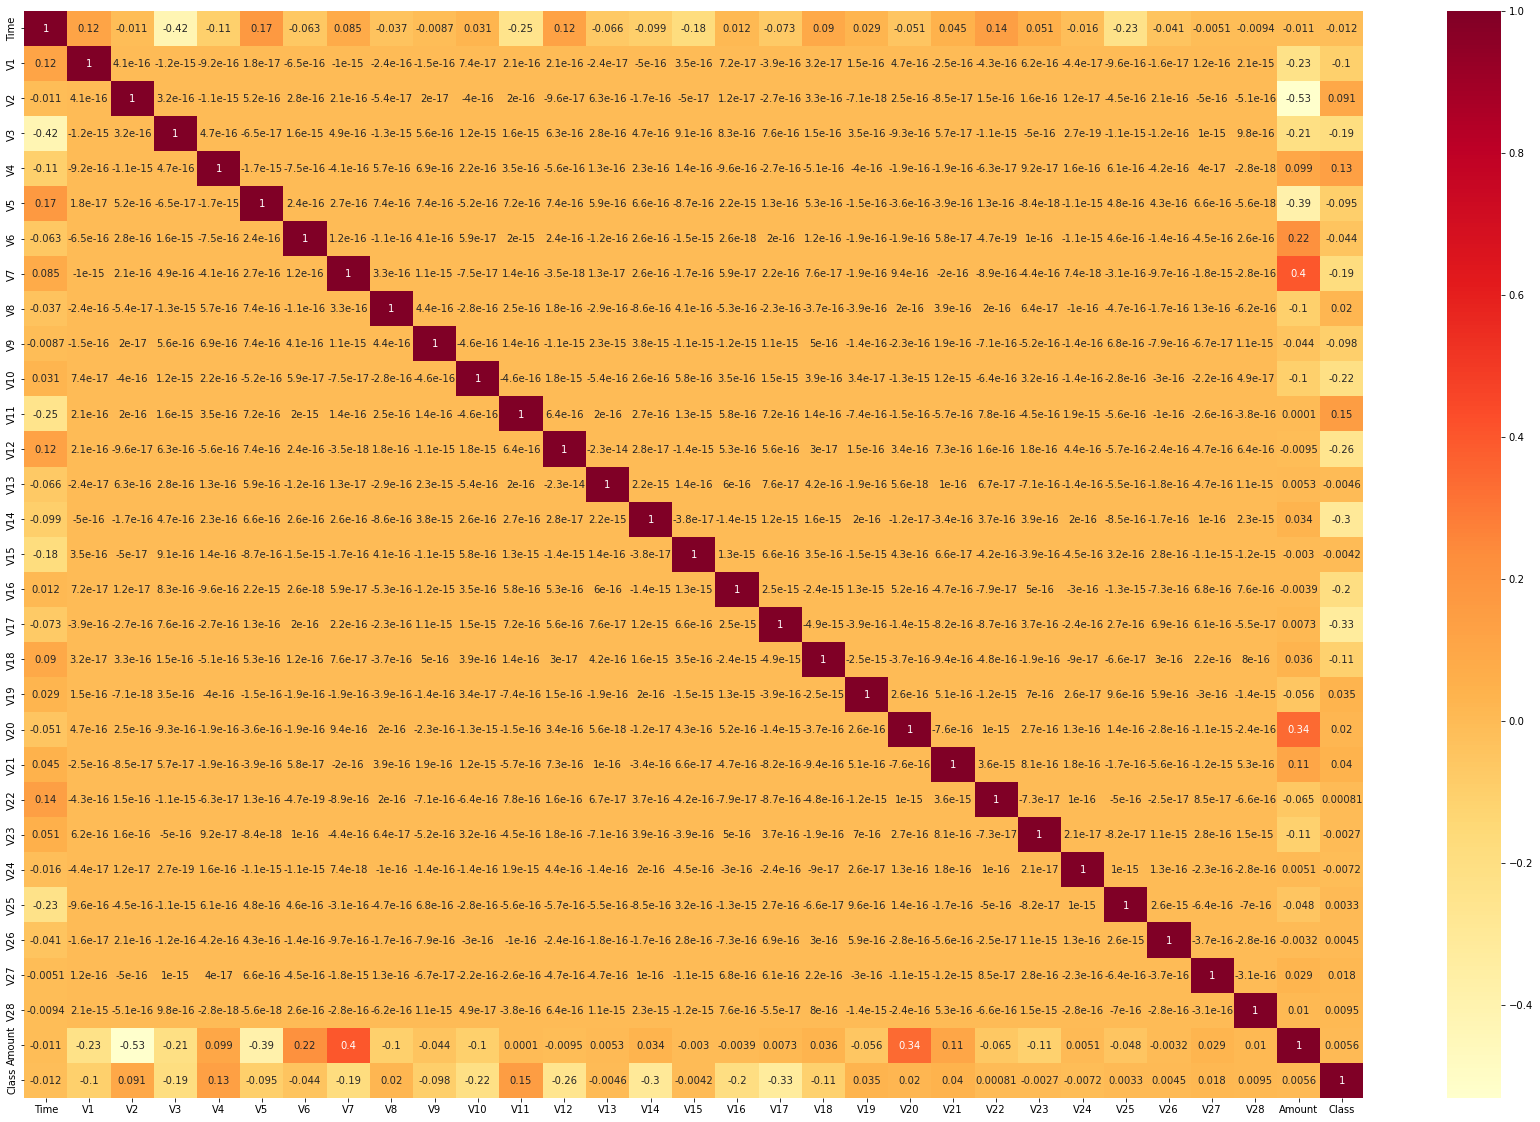

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(cred.corr(),annot=True,cmap='YlOrRd')
plt.show()

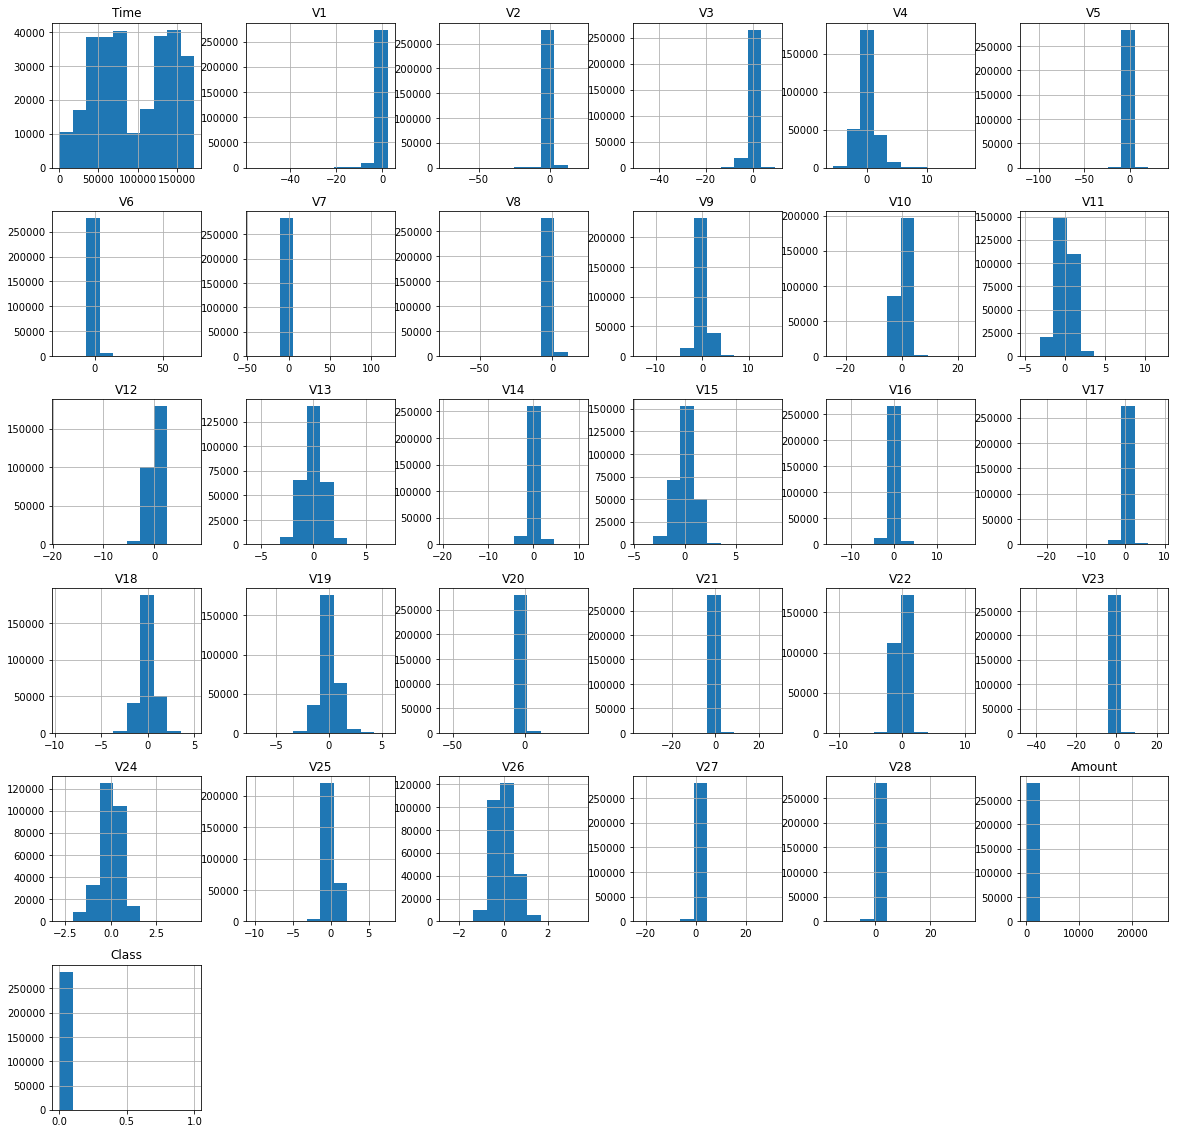

In [8]:
cred.hist(figsize=(20,20))
plt.show()

**5.1 Sampling Technique**

Text(0, 0.5, 'Number of (V1-V28) Data')

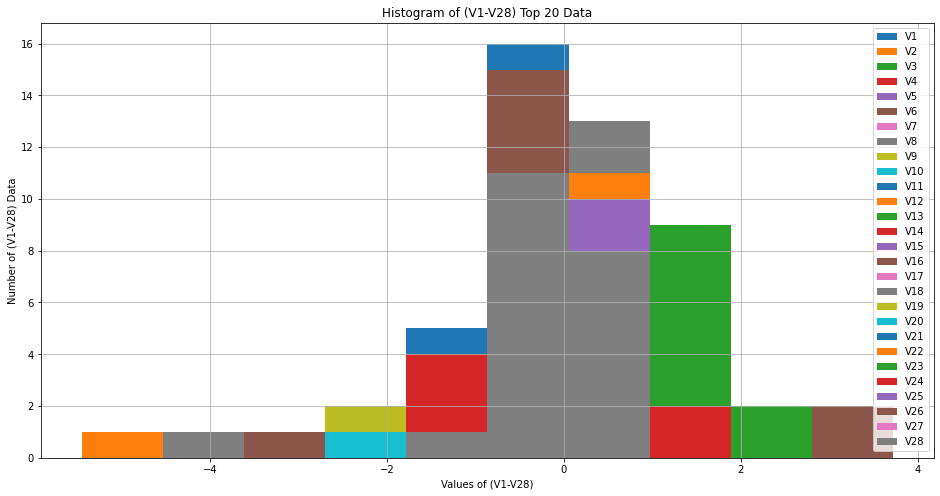

In [9]:
cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(20)
cred_hd.plot(kind='hist',figsize=(16,8),grid=True)
plt.title('Histogram of (V1-V28) Top 20 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Number of (V1-V28) Data')

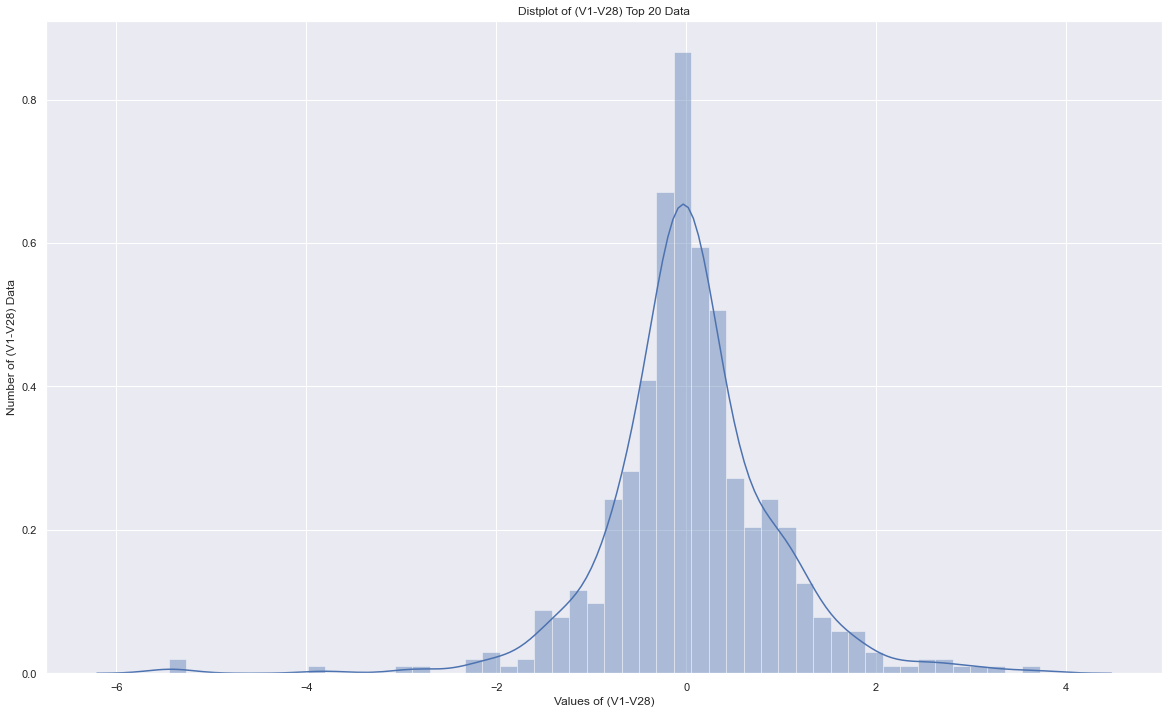

In [10]:
sns.set(rc={'figure.figsize':(20,12)})
sns.distplot(cred_hd)
plt.title('Distplot of (V1-V28) Top 20 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Number of (V1-V28) Data')

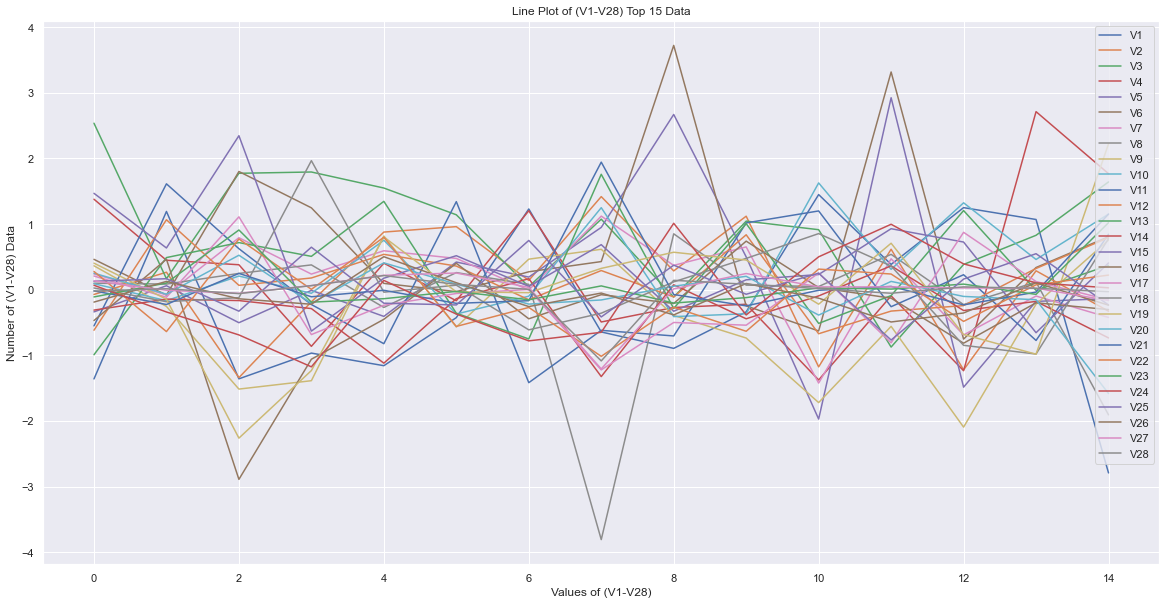

In [11]:
cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(15)
cred_hd.plot(kind='line',figsize=(20,10),grid=True)
plt.title('Line Plot of (V1-V28) Top 15 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Values of (V1 - V28)')

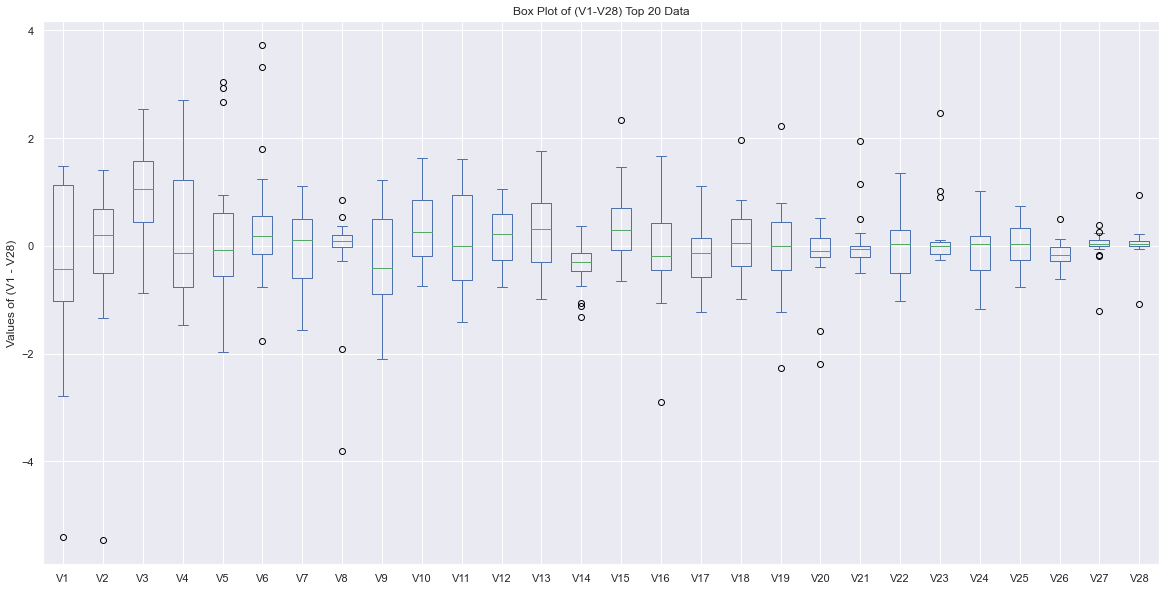

In [12]:
cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(20)
cred_hd.plot(kind='box',figsize=(20,10),grid=True)
plt.title('Box Plot of (V1-V28) Top 20 Data')
plt.ylabel('Values of (V1 - V28)')

Text(0.5, 1.0, 'Bar Plot of (V1-V10) Top 15 Data')

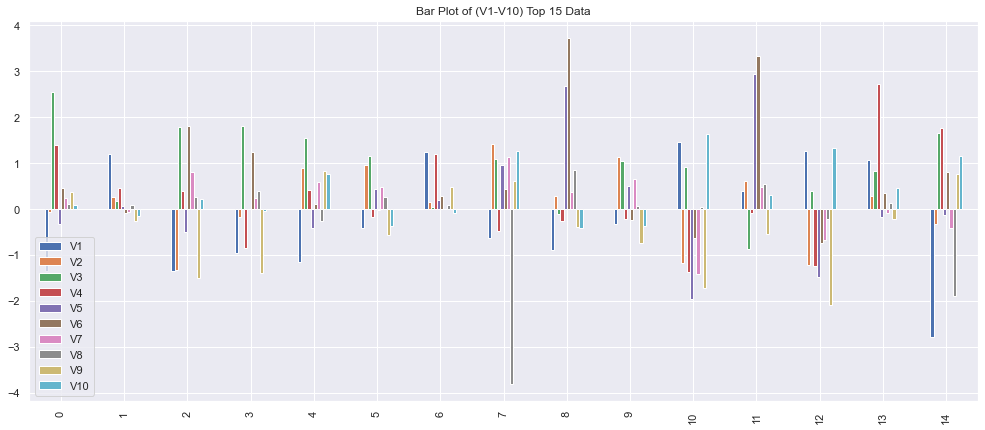

In [13]:
cred_=cred.iloc[:,1:11]
cred_hd=cred_.head(15)
cred_hd.plot(kind='bar',figsize=(17,7),grid=True)
plt.title('Bar Plot of (V1-V10) Top 15 Data')

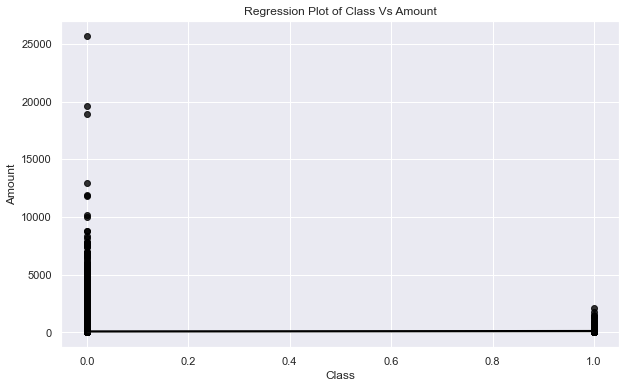

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(x='Class',y='Amount',data=cred,color='black')
plt.title('Regression Plot of Class Vs Amount')
plt.show()

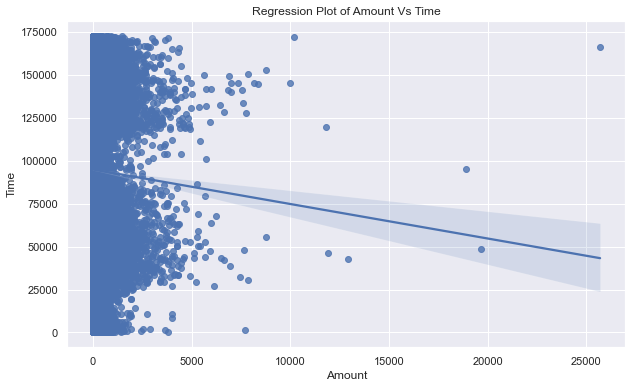

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='Time',data=cred)
plt.title('Regression Plot of Amount Vs Time')
plt.show()

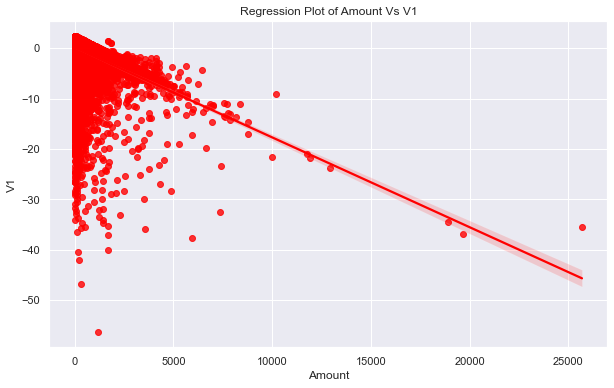

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='V1',data=cred,color='red')
plt.title('Regression Plot of Amount Vs V1')
plt.show()

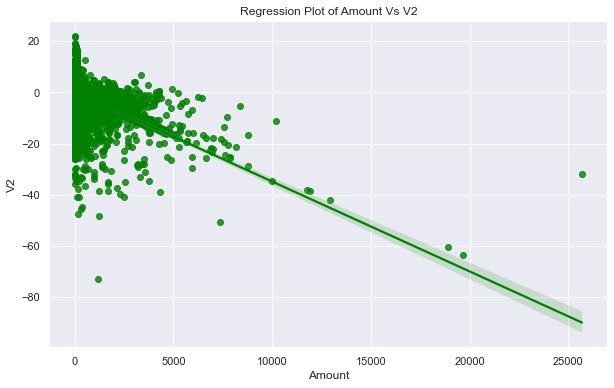

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='V2',data=cred,color='green')
plt.title('Regression Plot of Amount Vs V2')
plt.show()

**6. Determining the Fraud Data Cases (finding outliers)**

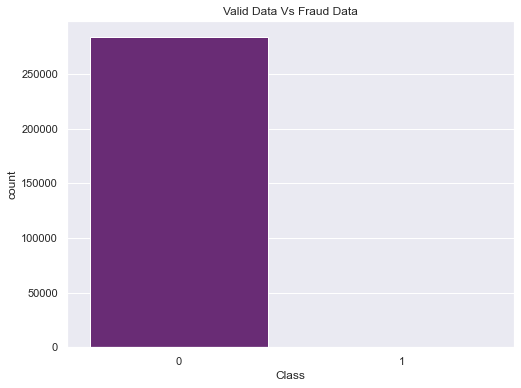

In [81]:
sns.countplot(cred['Class'],palette='magma')
plt.title('Valid Data Vs Fraud Data')
plt.show()

In [19]:
fraud_dt=cred[cred['Class']==1]
valid_dt=cred[cred['Class']==0]

print('Fraud Cases:',len(fraud_dt))
print('Valid Cases:',len(valid_dt))

Fraud Cases: 492
Valid Cases: 284315


In [20]:
outlier_fraction=len(fraud_dt)/len(valid_dt)
outlier_fraction

0.0017304750013189597

**7. Data Preprocessing**

**7.1 . Setting X and Y Variables**

In [21]:
x=cred.iloc[:,1:29]
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [22]:
y=cred.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

**7.2. Splitting Train and Test DataSet**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
print('Train Size = {} \nTest Size = {} \nTotal Size = {}'.format(x_train.shape[0],x_test.shape[0],x.shape[0]))

Train Size = 213605 
Test Size = 71202 
Total Size = 284807


**8 - Model Analysis**

**8.1 Random Forest Classifier Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc

RandomForestClassifier()

In [26]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
rfc_score=rfc.score(x_test,y_test)*100
print("Accuracy of the Credit Card data :",rfc_score)

Accuracy of the Credit Card data : 99.95365298727565


**8.2. Confusion Matrix**

* A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. The term confusion matrix itself is very simple, but its related terminology can be a little confusing. Here, some simple explanation is given for this technique.
> **The confusion matrix shows the ways in which your classification model is confused when it makes predictions.**

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[71082,    26],
       [    7,    87]], dtype=int64)

<AxesSubplot:>

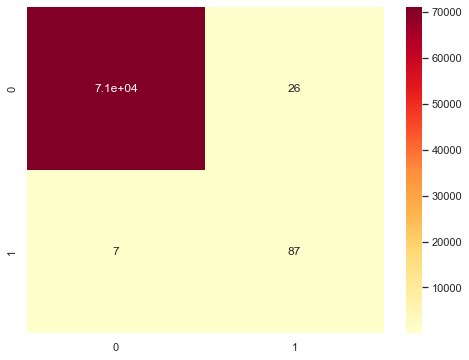

In [80]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(cm,annot=True,cmap='YlOrRd')

**8.3 Determining Accuracy, Recall and Precision Score**

In [64]:
Accuracy = (71082+87)/(71082+26+7+87)
print('Accuracy Score by formula is:',Accuracy)

Accuracy Score by formula is: 0.9995365298727564


In [47]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print(f'Accuracy of the Model: {(acc_score*100)//1} %')

Accuracy of the Model: 99.0 %


**The model has to be tuned by adding much better independent variables**

In [61]:
#1. Recall Score by formula for 0 is : (TP/(TP+FN)): 
print('Recall Score by formula for 0 is:',(71082/(71086+26)))
#2. Recall Score by formula for 1 is : (TP/(TP+FN)): 
print('Recall Score by formula for 1 is:',(87/(87+7)))

Recall Score by formula for 0 is: 0.9995781302733716
Recall Score by formula for 1 is: 0.925531914893617


Model is having a high precision of 99.9% and 92.5% for 0 & 1 respectively. Its an indication the model is well robust enough to classify correctly that the transaction is fraudient or valid. Once it has casured a doubtful transaction

In [63]:
#3. Precision Score by formula for 0 is : (TP/(TP+FP)): 
print('Precision Score by formula for 0 is:',(71082/(71086+87)))
#4. Precision Score by formula for 1 is : (TP/(TP+FP)): 
print('Precision Score by formula for 1 is:',(87/(87+26)))

Precision Score by formula for 0 is: 0.9987214252595787
Precision Score by formula for 1 is: 0.7699115044247787


Model is having a high precision of 99.9% and 76.9% for 0 & 1 respectively. Its an indication the model is well robust enough to classify correctly that the transaction is fraudient or valid. Once it has casured a doubtful transaction

In [56]:
from sklearn.metrics import recall_score,precision_score
prec_score=precision_score(y_test,y_pred)
print(f'Precision Score of the Model: {(prec_score*100)//1} %')
rec_score=recall_score(y_test,y_pred)
print(f'Recall Score of the Model: {(rec_score*100)//1} %')

Precision Score of the Model: 92.0 %
Recall Score of the Model: 76.0 %
